# Data Incubator Project: Exploring the MEPS database - Asset 1
## MEPS HC-183: MEPS Panel 19 Longitudinal Data File
Description: This file is a two-year longitudinal file derived from the respondents to the MEPS Panel 19 sample. The persons on this data set represent those who were in the MEPS population (U.S. civilian noninstitutionalized) for all or part of the 2014-2015 period. The file contains a longitudinal weight variable (LONGWT) and all variables from the 2014 and 2015 full-year consolidated data files (HC-171 and HC-181, respectively). The weight variable (LONGWT), when applied to the persons who participated in both 2014 and 2015, will enable the user to make national estimates of person-level changes in selected variables (e.g., health insurance, health status, utilization and expenditures). In addition, LONGWT can be used to develop cross-sectional type estimates for the two-year period and for each year individually based on only the Panel 19 sample.

In [1]:
# Import Dependencied
import os.path
from os import path
import ntpath
import requests
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
local_dir='C:\\Users\\wc11\\OneDrive\\Documents\\Graduate Research\\PPMI_2020\\'
url = 'https://meps.ahrq.gov/mepsweb/data_files/pufs/h183ssp.zip'
zip_name = ntpath.basename(url)
dir_name = os.path.splitext(zip_name)[0]

In [3]:
if not path.exists(local_dir + dir_name):
    print('Downloading data...', end = ' ')
    myfile = requests.get(url)
    open(local_dir + zip_name, 'wb').write(myfile.content)
    print('Done')

    print('Unzipping...', end = ' ')
    with ZipFile(local_dir + zip_name, 'r') as zipObj:
        zipObj.extractall(local_dir + dir_name)
    print('Done')
else:
    print('Data already downloaded, skipping')

Data already downloaded, skipping


In [4]:
print('Reading in file...', end = ' ')
file = local_dir + dir_name + '\\h183.csv'
data = pd.read_csv(file)
print('Done')
data.head()

Reading in file... Done


,Unnamed: 0,DUID,PID,DUPERSID,PANEL,YEARIND,SAQRDS24,ALL5RDS,DIED,INST,...,RXOSRY1,RXOSRY2,RXPTRY1,RXPTRY2,RXOTHY1,RXOTHY2,VARPSU,VARSTR,LONGWT,LSAQWT
0,1,60001,101,60001101,19,1,1,1,0,0,...,0,0,0,0,17,0,1,1019,39761.667305,44377.148888
1,2,60001,102,60001102,19,1,1,1,0,0,...,0,0,0,0,0,4,1,1019,38812.991354,44987.121771
2,3,60001,103,60001103,19,1,1,1,0,0,...,0,0,0,0,0,0,1,1019,46083.339064,66456.525430
3,4,60001,104,60001104,19,1,1,1,0,0,...,0,0,0,0,0,0,1,1019,37196.263715,40325.054495
4,5,60001,105,60001105,19,1,0,1,0,0,...,0,0,0,0,0,265,1,1019,44365.766126,0.000000


In [5]:
def ttest_check(cat_A, cat_B, skip_plot = False):
    # cat_A is a binary metric where 1 is YES, 2 is NO
    # cat_B is a scalar metric where values < 0 are ignored
    # Run an independent samples TTEST between YES and NO
    t, p = stats.ttest_ind(data.loc[(data[cat_A] == 1) & (data[cat_B] >= 0), cat_B], 
                        data.loc[(data[cat_A] == 2) & (data[cat_B] >= 0), cat_B])

    grp_y_mean = data.loc[(data[cat_A] == 1) & (data[cat_B] >= 0), cat_B].mean()
    grp_n_mean = data.loc[(data[cat_A] == 2) & (data[cat_B] >= 0), cat_B].mean()
    if grp_y_mean > grp_n_mean:
        note = '(Yes > No)'
    else:
        note = '(No > Yes)'

    # Create a boxplot comparing the groups
    if skip_plot is False:
        plt.boxplot([data.loc[(data[cat_A] == 1) & (data[cat_B] >= 0),cat_B], 
                    data.loc[(data[cat_A] == 2) & (data[cat_B] >= 0),cat_B]],
                    showmeans=True)
        plt.xticks([1, 2],['YES', 'NO'])
        plt.title(cat_A)
        plt.ylabel('# of days missed work due to illness or injury')
        plt.xlabel('Unable to get necessary dental care?')
        plt.show()
        
    print('{}: p-value for Yes vs. No: {} {}'.format(cat_A, p, note))

### An inability to get necessary dental care is associated with a higher number of missed workdays due to illness

DNUNAB4 asks the participant if they are unable to get necessary dental care


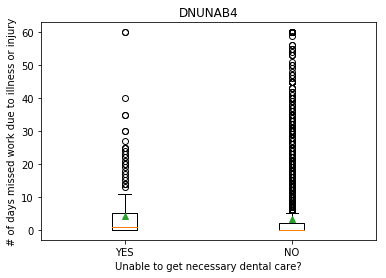

DNUNAB4: p-value for Yes vs. No: 0.03926462876931402 (Yes > No)


In [6]:
print('DNUNAB4 asks the participant if they are unable to get necessary dental care')
ttest_check('DNUNAB4', 'DDNWRKY2', False)

This is an interesting finding because typically dental care is not thought of as a necessity, and thus may employee healthcare plans do not include a dental component. However these results suggest that employers that wish to minimize the number of missed workdays due to illness should include a dental plan in their healthcare package. It should be noted that the results are not conclusive and the effects of socioeconomic status need to be accounted for in future models